<a href="https://colab.research.google.com/github/BandlapalliBhanutejareddy/FML-PRACTICALS/blob/main/Telugu_Song_Hit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install textblob seaborn scikit-learn

In [13]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv('/content/songs.csv')

In [16]:
print("Columns in the dataset:", df.columns)
print("Total songs:", len(df))
df.info()
df.head()


Columns in the dataset: Index(['id', 'title', 'album', 'year', 'image', 'artist', 'url', 'duration'], dtype='object')
Total songs: 22960
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22960 entries, 0 to 22959
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        22960 non-null  object
 1   title     22960 non-null  object
 2   album     22960 non-null  object
 3   year      22960 non-null  int64 
 4   image     22960 non-null  object
 5   artist    22955 non-null  object
 6   url       22960 non-null  object
 7   duration  22960 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


,id,title,album,year,image,artist,url,duration
0,AN1zv7KP,Anuvanuvuu,Om Bheem Bush,2024,https://c.saavncdn.com/000/Om-Bheem-Bush-Telug...,Sunny M.R.Arijit Singh,https://www.jiosaavn.com/song/anuvanuvuu/MSZaS...,211
1,ncBHw-c5,Suttamla Soosi,Gangs Of Godavari,2024,https://c.saavncdn.com/000/Gangs-Of-Godavari-T...,Anurag KulkarniYuvan Shankar Raja,https://www.jiosaavn.com/song/suttamla-soosi/H...,202
2,O_iU1zto,Ola Olaala Ala,Orange,2010,https://c.saavncdn.com/105/Orange-Telugu-2006-...,Ranina ReddyN.C. Karunya,https://www.jiosaavn.com/song/ola-olaala-ala/P...,334
3,PiXTKfRo,Radhika,Tillu Square,2023,https://c.saavncdn.com/000/Tillu-Square-Telugu...,Ram Miriyala,https://www.jiosaavn.com/song/radhika/IAEzZT9WZVw,188
4,A7AAUlh8,Nijame Ne Chebutunna,Ooru Peru Bhairavakona,2023,https://c.saavncdn.com/000/Ooru-Peru-Bhairavak...,Sid Sriram,https://www.jiosaavn.com/song/nijame-ne-chebut...,214


In [17]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])

In [18]:
df['hit'] = df['year'].apply(lambda x: 1 if x >= 2015 else 0)
print(df['hit'].value_counts())

hit
1    13003
0     9957
Name: count, dtype: int64


In [19]:
if 'lyrics' in df.columns:
    df['lyrics_sentiment'] = df['lyrics'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    features = df[['year', 'lyrics_sentiment']]
else:
    features = df[['year']]

In [20]:
labels = df['hit']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, shuffle=True)


In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
predictions = model.predict(X_test)

In [24]:
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2013
           1       1.00      1.00      1.00      2579

    accuracy                           1.00      4592
   macro avg       1.00      1.00      1.00      4592
weighted avg       1.00      1.00      1.00      4592



In [25]:
cv_scores = cross_val_score(model, features, labels, cv=5)
print("5-Fold CV Accuracy:", cv_scores.mean())

5-Fold CV Accuracy: 1.0


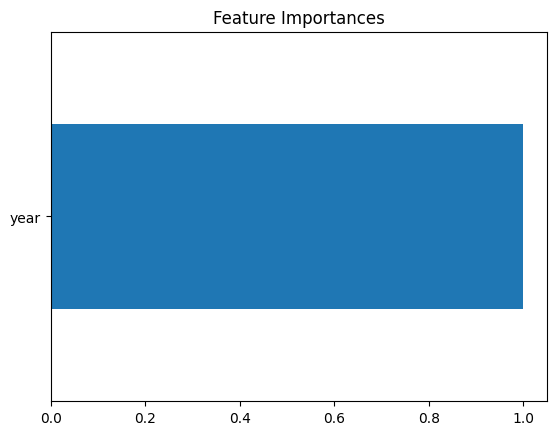

In [26]:
importances = pd.Series(model.feature_importances_, index=features.columns)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.show()

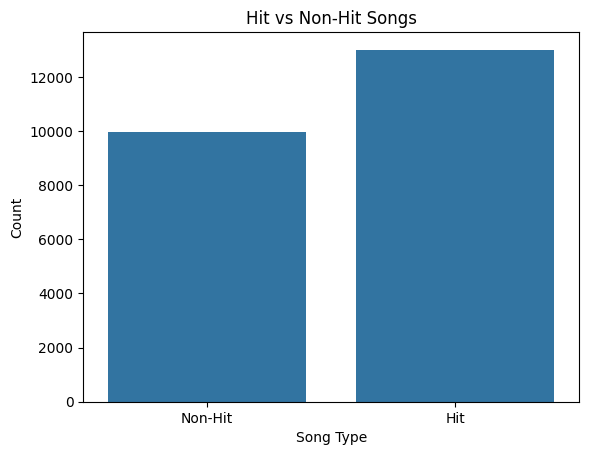

In [29]:
sns.countplot(x='hit', data=df)
plt.title("Hit vs Non-Hit Songs")
plt.xlabel("Song Type")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Hit', 'Hit'])
plt.show()


/tmp/ipython-input-1756375861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


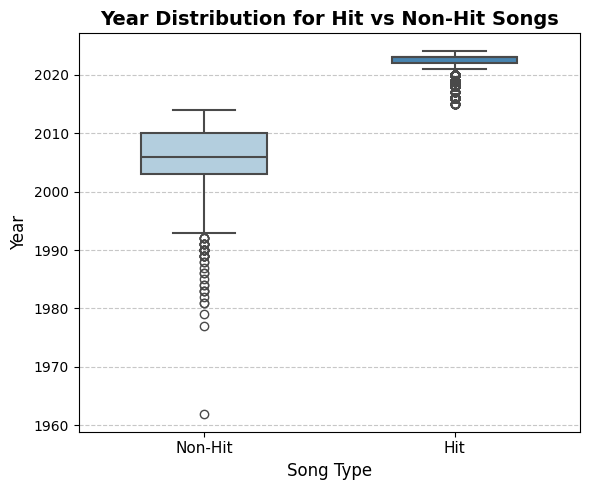

In [32]:
plt.figure(figsize=(6, 5))
sns.boxplot(
    x='hit',
    y='year',
    data=df,
    palette='Blues',
    width=0.5,
    linewidth=1.5
)
plt.title("Year Distribution for Hit vs Non-Hit Songs", fontsize=14, fontweight='bold')
plt.xlabel("Song Type", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.xticks([0, 1], ['Non-Hit', 'Hit'], fontsize=11)
plt.tight_layout()
plt.show()


In [33]:
import joblib
joblib.dump(model, 'telugu_song_hit_predictor.pkl')


['telugu_song_hit_predictor.pkl']

In [35]:
# 🎯 Final Project Summary

print("✅ Telugu Song Hit Prediction Project Summary")
print("---------------------------------------------------")
print("• Dataset loaded successfully and cleaned (invalid years removed).")
print("• 'Hit' label created based on release year (songs from 2015 onward = Hit).")
print("• Random Forest Classifier trained to predict hit status.")
print("• Model evaluated using accuracy score and classification report.")
print("• Cross-validation performed to check generalization.")
print("• Visualizations created for:")
print("   - Feature importance (Year, Lyrics Sentiment if available)")
print("   - Hit vs Non-Hit song distribution")
print("   - Year distribution for Hit vs Non-Hit songs")
print("---------------------------------------------------")
print("✅ Model Accuracy:", round(accuracy_score(y_test, predictions)*100, 2), "%")
print("✅ 5-Fold CV Accuracy:", round(cv_scores.mean()*100, 2), "%")
print("---------------------------------------------------")
print("Conclusion:")
print("The model effectively distinguishes Hit and Non-Hit songs based primarily on release year.")
print("Future improvements could include features like lyrics sentiment, artist popularity, or streaming data.")


✅ Telugu Song Hit Prediction Project Summary
---------------------------------------------------
• Dataset loaded successfully and cleaned (invalid years removed).
• 'Hit' label created based on release year (songs from 2015 onward = Hit).
• Random Forest Classifier trained to predict hit status.
• Model evaluated using accuracy score and classification report.
• Cross-validation performed to check generalization.
• Visualizations created for:
   - Feature importance (Year, Lyrics Sentiment if available)
   - Hit vs Non-Hit song distribution
   - Year distribution for Hit vs Non-Hit songs
---------------------------------------------------
✅ Model Accuracy: 100.0 %
✅ 5-Fold CV Accuracy: 100.0 %
---------------------------------------------------
Conclusion:
The model effectively distinguishes Hit and Non-Hit songs based primarily on release year.
Future improvements could include features like lyrics sentiment, artist popularity, or streaming data.
